In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Guia 1

Ejercicio 3: Aplicacion

Utilice las herramientas aprendidas en esta unidad para implementar un sistema que permita identificar una botella que no esta correctamente llena. Las imagenes que se proporcionaran son capturadas con una camara fija, en escala de grises y directamente de la lınea de envasado. Para implementar el sistema debera bastarle una imagen de ejemplo “botella.tif” (que encontrara en el repositorio). Adicionalmente, se espera que el sistema pueda:

- identificar una botella no-llena en cualquier posicion de la imagen.
- indicar la posicion de la botella en la imagen (podrıa ser con un recuadro, informando la posicion relativa entre botellas, la posicion absoluta en pixels, etc).
- informar el porcentaje de llenado de la botella no-llena.

Cantidad de botellas en la imagen:  5
Botella N° 1 está llena (97.435897 llena)
Botella N° 2 está llena (98.076923 llena)
Botella N° 3 no está llena (77.564103 llena)
Botella N° 4 está llena (98.076923 llena)
Botella N° 5 está llena (97.435897 llena)


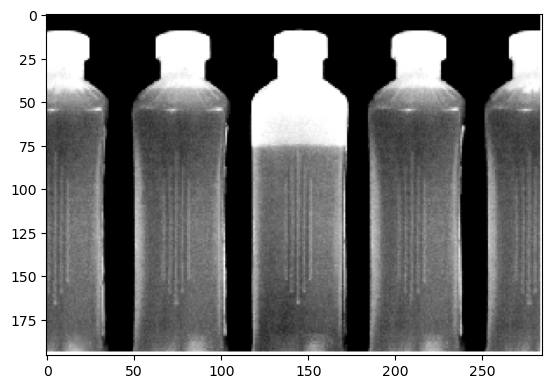

In [2]:
img_gray = cv.imread("imagenes/botellas.tif",cv.IMREAD_GRAYSCALE)

H,W = img_gray.shape
ROW = int(H*3/4) #altura para trazar la linea en Y (horizontal)
search_bottom = 0 #search_bottom = 0 -> no buscas fondo (se utiliza como flag)
y = [] #guardamos las posiciones donde comienzan y terminan las botellas

for j in range(W):
    if search_bottom == 1 and img_gray[ROW,j] <= 50: #detecta si salio de la botella
        y.append(j)
        search_bottom = 0
    elif search_bottom == 0 and img_gray[ROW,j] >= 120 and img_gray[ROW,j] <= 200: #detecta inicio de la botella (pixeles de liquido gris)
        y.append(j)
        search_bottom = 1

#si tam lista es impar significa que hay una botella al final (derecha) la cual esta incompleta
if len(y)%2!=0: 
    y.append(W-1) 
    
num_bottles = len(y)//2
print("Cantidad de botellas en la imagen: ", num_bottles)

a = [] #guardamos a partir de que pixel comienza el liquido en cada botella(recorriendo de arriba hacia abajo)
for x in range(num_bottles):
    column = (y[x*2]+y[x*2+1])//2 #sacamos la posicion Y correspondiente a la mitad de la botella
    for i in range(H):
        if img_gray[i,column] >= 120 and img_gray[i,column] <= 200: #contamos la cantidad de pixeles que corresponden al liquido
            a.append(i)
            break
          
pixelFullBottle = 40 #estimado a partir de la imagen (con el widget)
for x in range(len(a)):
    if a[x] >= (pixelFullBottle):
        b = (H-a[x])/(H - pixelFullBottle) * 100
        if b < 95: #umbral 95%
            print("Botella N° %d no está llena (%f llena)" %(x+1,b))
        else: 
            print("Botella N° %d está llena (%f llena)" %(x+1,b))

plt.imshow(img_gray,cmap='gray',vmin=0 ,vmax=255)
plt.show()

Guia 2


Ejercicio 4.2:

Al final del proceso de manufactura de placas madres, de marca ASUS modelo A7V600, se obtienen dos clases de producto final: A7V600-x y A7V600-SE. 
Implemente un algoritmo, que a partir de una imagen, determine que tipo de placa es. Haga uso de las tecnicas de realce apendidas y utilice las imagenes a7v600-x.gif y a7v600-SE.gif. Adapte el metodo de forma que contemple el reconocimiento de imagenes que han sido afectadas por un ruido aleatorio impulsivo (a7v600-x(RImpulsivo).gif y a7v600-SE(RImpulsivo).gif ).


In [3]:
import math
def mother_type(img):
    img = img[103:147,198:242] #se toma una roi de la parte que es diferente en ambas motherboards
    imgMean = np.mean(img)
    if(math.isclose(imgMean,38,abs_tol=5)): #se fija un umbral que corresponde al nivel de gris que diferencia a una mother de la otra
        print('Es un a7v600-XRI')
    else:
        print('Es un a7v600-SERI')

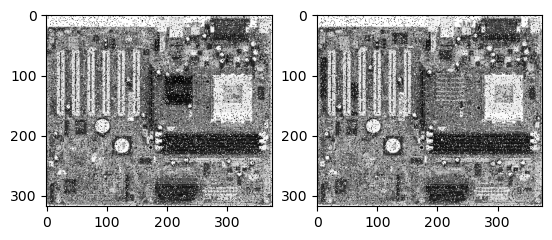

Es un a7v600-XRI
Es un a7v600-SERI


In [4]:
proc_x = cv.imread('imagenes/a7v600-XRImpulsivo.tiff',cv.IMREAD_GRAYSCALE)
proc_se = cv.imread('imagenes/a7v600-SERImpulsivo.tiff',cv.IMREAD_GRAYSCALE)

fig,ax = plt.subplots(1,2)
ax[0].imshow(proc_x,cmap="gray",vmin=0,vmax=255) 
ax[1].imshow(proc_se,cmap="gray",vmin=0,vmax=255) 
plt.show()
mother_type(proc_x)
mother_type(proc_se)

Guia 2

Ejercicio 4.3

En una fabrica de medicamentos se desea implementar un sistema para la inspeccion visual automatica de blisters en la lınea de empaquetado. La adquisicion de la imagen se realiza en escala de grises mediante una camara CCD fija y bajo condiciones controladas de iluminacion, escala y enfoque. El objetivo consiste en determinar en cada instante si el blister que esta siendo analizado se encuentra incompleto, en cuyo caso la region correspondiente a la pıldora faltante presenta una intensidad similar al fondo. Escriba una funcion que reciba como parametro la imagen del blister a analizar y devuelva un mensaje indicando si el mismo contiene o no la totalidad de las pıldoras. En caso de estar incompleto, indique la posicion (x,y) de las pıldoras faltantes. Verifique el funcionamiento con las imagenes blister completo.jpg y blister incompleto.jpg.

In [5]:
def manual_filter(img):
    coord = np.ones((2,5))
    for i in np.arange(5):  #recorre filas y columnas medidas a partir de la posiciones en la imagen del blister
        for j in np.arange(2):
           if img[j*50+50,i*50+50]<50:
               print(f'La posicion col= {i+1} fila = {j+1} esta vacia')
               coord[j,i] = 0
    return coord

La posicion col= 3 fila = 2 esta vacia
Blister incompleto: 
 [[1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1.]]
Blister completo: 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


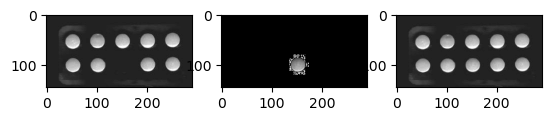

In [6]:
bliz_incompleto = cv.imread('imagenes/blister_incompleto.jpg',cv.IMREAD_GRAYSCALE)
bliz_completo = cv.imread('imagenes/blister_completo.jpg',cv.IMREAD_GRAYSCALE) 
img_filter = bliz_completo[:,0:291]-bliz_incompleto #lo usamos para visualizacion unicamente

#representaciones de las pildoras en filas y columnas, 1 indica que hay pildora, 0 que no
coord2 = manual_filter(bliz_incompleto)
print("Blister incompleto: \n",coord2)

coord = manual_filter(bliz_completo)
print("Blister completo: \n",coord)

fig,ax = plt.subplots(1,3)
ax[0].imshow(bliz_incompleto,cmap="gray",vmin=0,vmax=255) 
ax[1].imshow(img_filter,cmap="gray",vmin=0,vmax=255) 
ax[2].imshow(bliz_completo,cmap="gray",vmin=0,vmax=255) 
plt.show()

Guia 2.2

Ejercicio 2

Realice un algoritmo de busqueda por correlacion de histogramas de intensidad. Se debe informar el contenido de la imagen: Bandera Caricatura, Personaje o Paisaje. Utilice las imagenes disponibles en Busqueda histograma.zip.


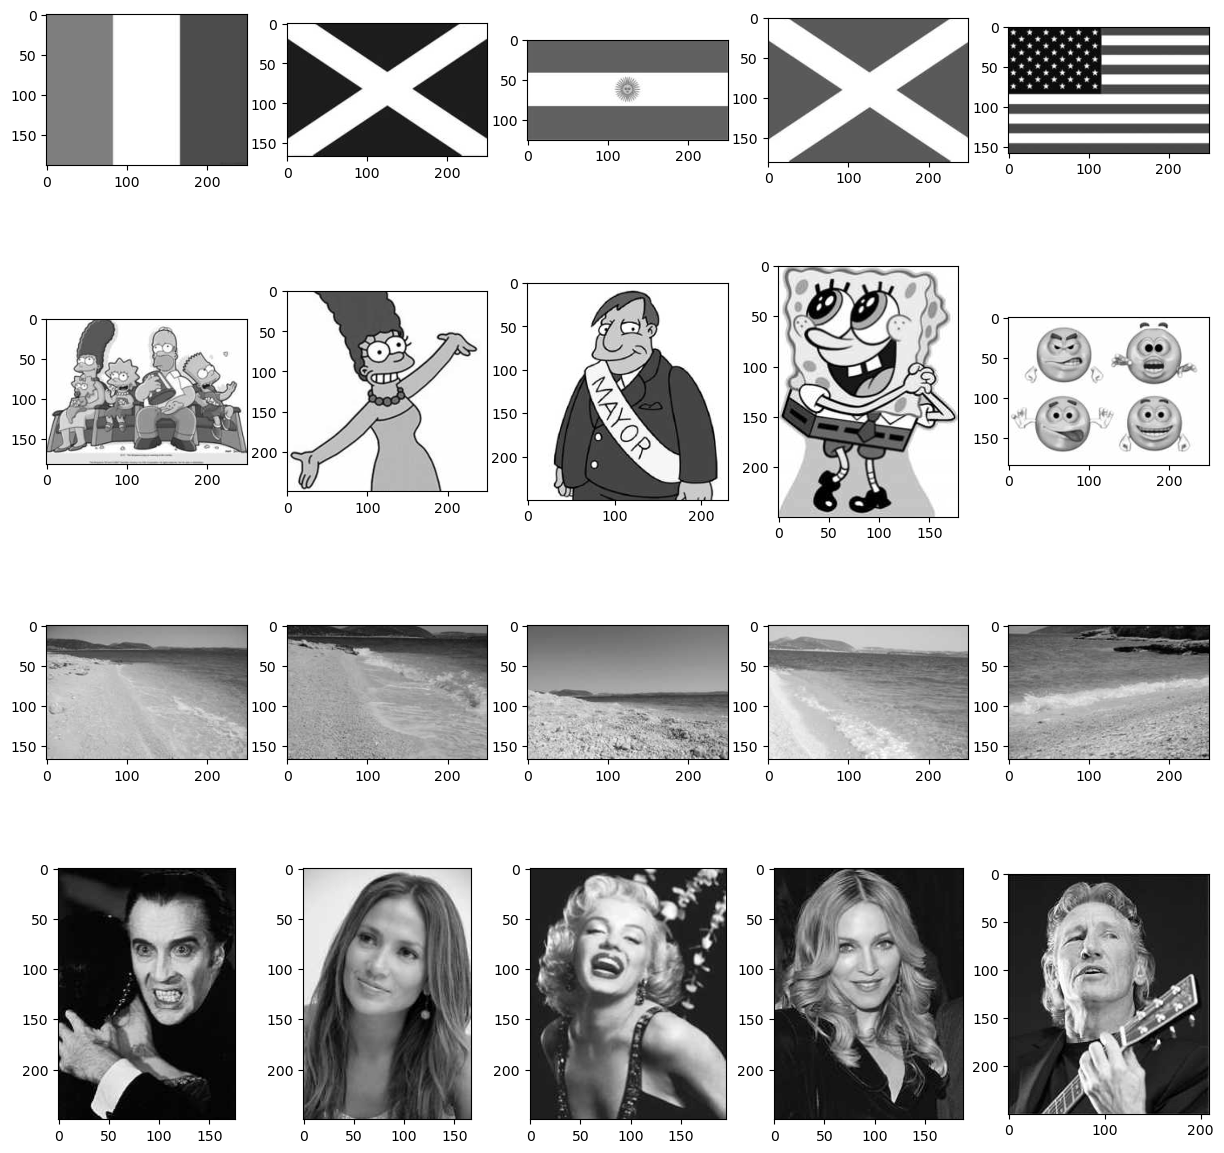

In [7]:
imgFlag01 = cv.imread("imagenes/Busqueda_histograma/Bandera01.jpg",cv.IMREAD_GRAYSCALE)
imgFlag02 = cv.imread("imagenes/Busqueda_histograma/Bandera02.jpg",cv.IMREAD_GRAYSCALE)
imgFlag03 = cv.imread("imagenes/Busqueda_histograma/Bandera03.jpg",cv.IMREAD_GRAYSCALE)
imgFlag04 = cv.imread("imagenes/Busqueda_histograma/Bandera04.jpg",cv.IMREAD_GRAYSCALE)
imgFlag05 = cv.imread("imagenes/Busqueda_histograma/Bandera05.jpg",cv.IMREAD_GRAYSCALE)
imgCartoons01 = cv.imread("imagenes/Busqueda_histograma/Caricaturas01.jpg",cv.IMREAD_GRAYSCALE)
imgCartoons02 = cv.imread("imagenes/Busqueda_histograma/Caricaturas02.jpg",cv.IMREAD_GRAYSCALE)
imgCartoons03 = cv.imread("imagenes/Busqueda_histograma/Caricaturas03.jpg",cv.IMREAD_GRAYSCALE)
imgCartoons04 = cv.imread("imagenes/Busqueda_histograma/Caricaturas04.jpg",cv.IMREAD_GRAYSCALE)
imgCartoons05 = cv.imread("imagenes/Busqueda_histograma/Caricaturas05.jpg",cv.IMREAD_GRAYSCALE)
imgLandscape01 = cv.imread("imagenes/Busqueda_histograma/Paisaje01.jpg",cv.IMREAD_GRAYSCALE)
imgLandscape02 = cv.imread("imagenes/Busqueda_histograma/Paisaje02.jpg",cv.IMREAD_GRAYSCALE)
imgLandscape03 = cv.imread("imagenes/Busqueda_histograma/Paisaje03.jpg",cv.IMREAD_GRAYSCALE)
imgLandscape04 = cv.imread("imagenes/Busqueda_histograma/Paisaje04.jpg",cv.IMREAD_GRAYSCALE)
imgLandscape05 = cv.imread("imagenes/Busqueda_histograma/Paisaje05.jpg",cv.IMREAD_GRAYSCALE)
imgCharacter01 = cv.imread("imagenes/Busqueda_histograma/Personaje01.jpg",cv.IMREAD_GRAYSCALE)
imgCharacter02 = cv.imread("imagenes/Busqueda_histograma/Personaje02.jpg",cv.IMREAD_GRAYSCALE)
imgCharacter03 = cv.imread("imagenes/Busqueda_histograma/Personaje03.jpg",cv.IMREAD_GRAYSCALE)
imgCharacter04 = cv.imread("imagenes/Busqueda_histograma/Personaje04.jpg",cv.IMREAD_GRAYSCALE)
imgCharacter05 = cv.imread("imagenes/Busqueda_histograma/Personaje05.jpg",cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15,15)) 
ax[0,0].imshow(imgFlag01,cmap="gray",vmin=0,vmax=255)
ax[0,1].imshow(imgFlag02,cmap="gray",vmin=0,vmax=255)
ax[0,2].imshow(imgFlag03,cmap="gray",vmin=0,vmax=255)
ax[0,3].imshow(imgFlag04,cmap="gray",vmin=0,vmax=255)
ax[0,4].imshow(imgFlag05,cmap="gray",vmin=0,vmax=255)
ax[1,0].imshow(imgCartoons01,cmap="gray",vmin=0,vmax=255)
ax[1,1].imshow(imgCartoons02,cmap="gray",vmin=0,vmax=255)
ax[1,2].imshow(imgCartoons03,cmap="gray",vmin=0,vmax=255)
ax[1,3].imshow(imgCartoons04,cmap="gray",vmin=0,vmax=255)
ax[1,4].imshow(imgCartoons05,cmap="gray",vmin=0,vmax=255)
ax[2,0].imshow(imgLandscape01,cmap="gray",vmin=0,vmax=255)
ax[2,1].imshow(imgLandscape02,cmap="gray",vmin=0,vmax=255)
ax[2,2].imshow(imgLandscape03,cmap="gray",vmin=0,vmax=255)
ax[2,3].imshow(imgLandscape04,cmap="gray",vmin=0,vmax=255)
ax[2,4].imshow(imgLandscape05,cmap="gray",vmin=0,vmax=255)
ax[3,0].imshow(imgCharacter01,cmap="gray",vmin=0,vmax=255)
ax[3,1].imshow(imgCharacter02,cmap="gray",vmin=0,vmax=255)
ax[3,2].imshow(imgCharacter03,cmap="gray",vmin=0,vmax=255)
ax[3,3].imshow(imgCharacter04,cmap="gray",vmin=0,vmax=255)
ax[3,4].imshow(imgCharacter05,cmap="gray",vmin=0,vmax=255)

plt.show()

In [8]:
def correlationification(imagen1,imagen2): #funcion que define la correlacion entre los histogramas de 2 imagenes
    imagen_hist1,bins1 = np.histogram(imagen1.ravel(),256,[0,256])
    imagen_hist2,bins2 = np.histogram(imagen2.ravel(),256,[0,256])
    
    corr = np.correlate(imagen_hist1,imagen_hist2)

    return corr

def correWrapper(imagen1):
    imagenes = [[imgFlag01,"Flag"],
                [imgFlag02,"Flag"],
                #[imgFlag03,"Flag"],
                [imgFlag04,"Flag"],
                [imgFlag05,"Flag"],
                [imgCartoons01,"Cartoon"],
                #[imgCartoons02,"Cartoon"],
                [imgCartoons03,"Cartoon"],
                [imgCartoons04,"Cartoon"],
                [imgCartoons05,"Cartoon"],
                #[imgCharacter01,"Personaje"],
                [imgCharacter02,"Personaje"],
                [imgCharacter03,"Personaje"],
                [imgCharacter04,"Personaje"],
                [imgCharacter05,"Personaje"],
                [imgLandscape01,"Paisaje"],
                [imgLandscape02,"Paisaje"],
                [imgLandscape03,"Paisaje"],
                #[imgLandscape04,"Paisaje"],
                [imgLandscape05,"Paisaje"]
                ]
    corrMax=0
    tipo=""
    for img in imagenes: #busca la maxima correlacion de la imagen con el arreglo de las demas imagenes
        corrAux = correlationification(imagen1,img[0])
        if abs(corrAux) > abs(corrMax):
            corrMax=corrAux
            tipo=img[1]
    return tipo

In [9]:
print(correWrapper(imgCartoons02))
print(correWrapper(imgCharacter01))
print(correWrapper(imgLandscape04))
print(correWrapper(imgFlag03))

Cartoon
Flag
Paisaje
Cartoon


Guia 3

Ejercicio 4.2

Aplique un filtro pasa-bajos de su eleccion y el filtro bilateral a las siguientes
imagenes: mariposa02.png, flores02.jpg y lapices02.jpg (en escala de grises).
Compare los resultados y explique sus apreciaciones.

- Utilice la funcion implementada en la guıa anterior para visualizar perfiles de grises, eligiendo la misma fila o columna para la imagen original y las que han sido filtradas. Compare los resultados visualizandolos simultaneamente.
- [Opcional] Implemente una funcion que le permita extraer perfiles de grises de las 3 imagenes, de cualquier longitud y en cualquier direccion (a partir de clicks del mouse o mediante el ingreso de coordenadas) y que realice el ploteo de los perfiles superpuestos en diferentes colores.

In [10]:
mariposa = cv.imread("imagenes/mariposa02.png",cv.IMREAD_GRAYSCALE)
flores = cv.imread("imagenes/flores02.jpg",cv.IMREAD_GRAYSCALE)
lapices = cv.imread("imagenes/lapices02.jpg",cv.IMREAD_GRAYSCALE)

mariposa_box = cv.boxFilter(mariposa,-1,(15,15))
flores_box = cv.boxFilter(flores,-1,(7,7))
lapices_box = cv.boxFilter(lapices,-1,(3,3))

mariposa_bilateral = cv.bilateralFilter(mariposa,15,50,50)
flores_bilateral = cv.bilateralFilter(flores,15,25,25)
lapices_bilateral = cv.bilateralFilter(lapices,15,10,10)

fila=300
perfil_mariposa = mariposa[fila,:]
perfil_mariposa_box = mariposa_box[fila,:]
perfil_mariposa_bilateral = mariposa_bilateral[fila,:]


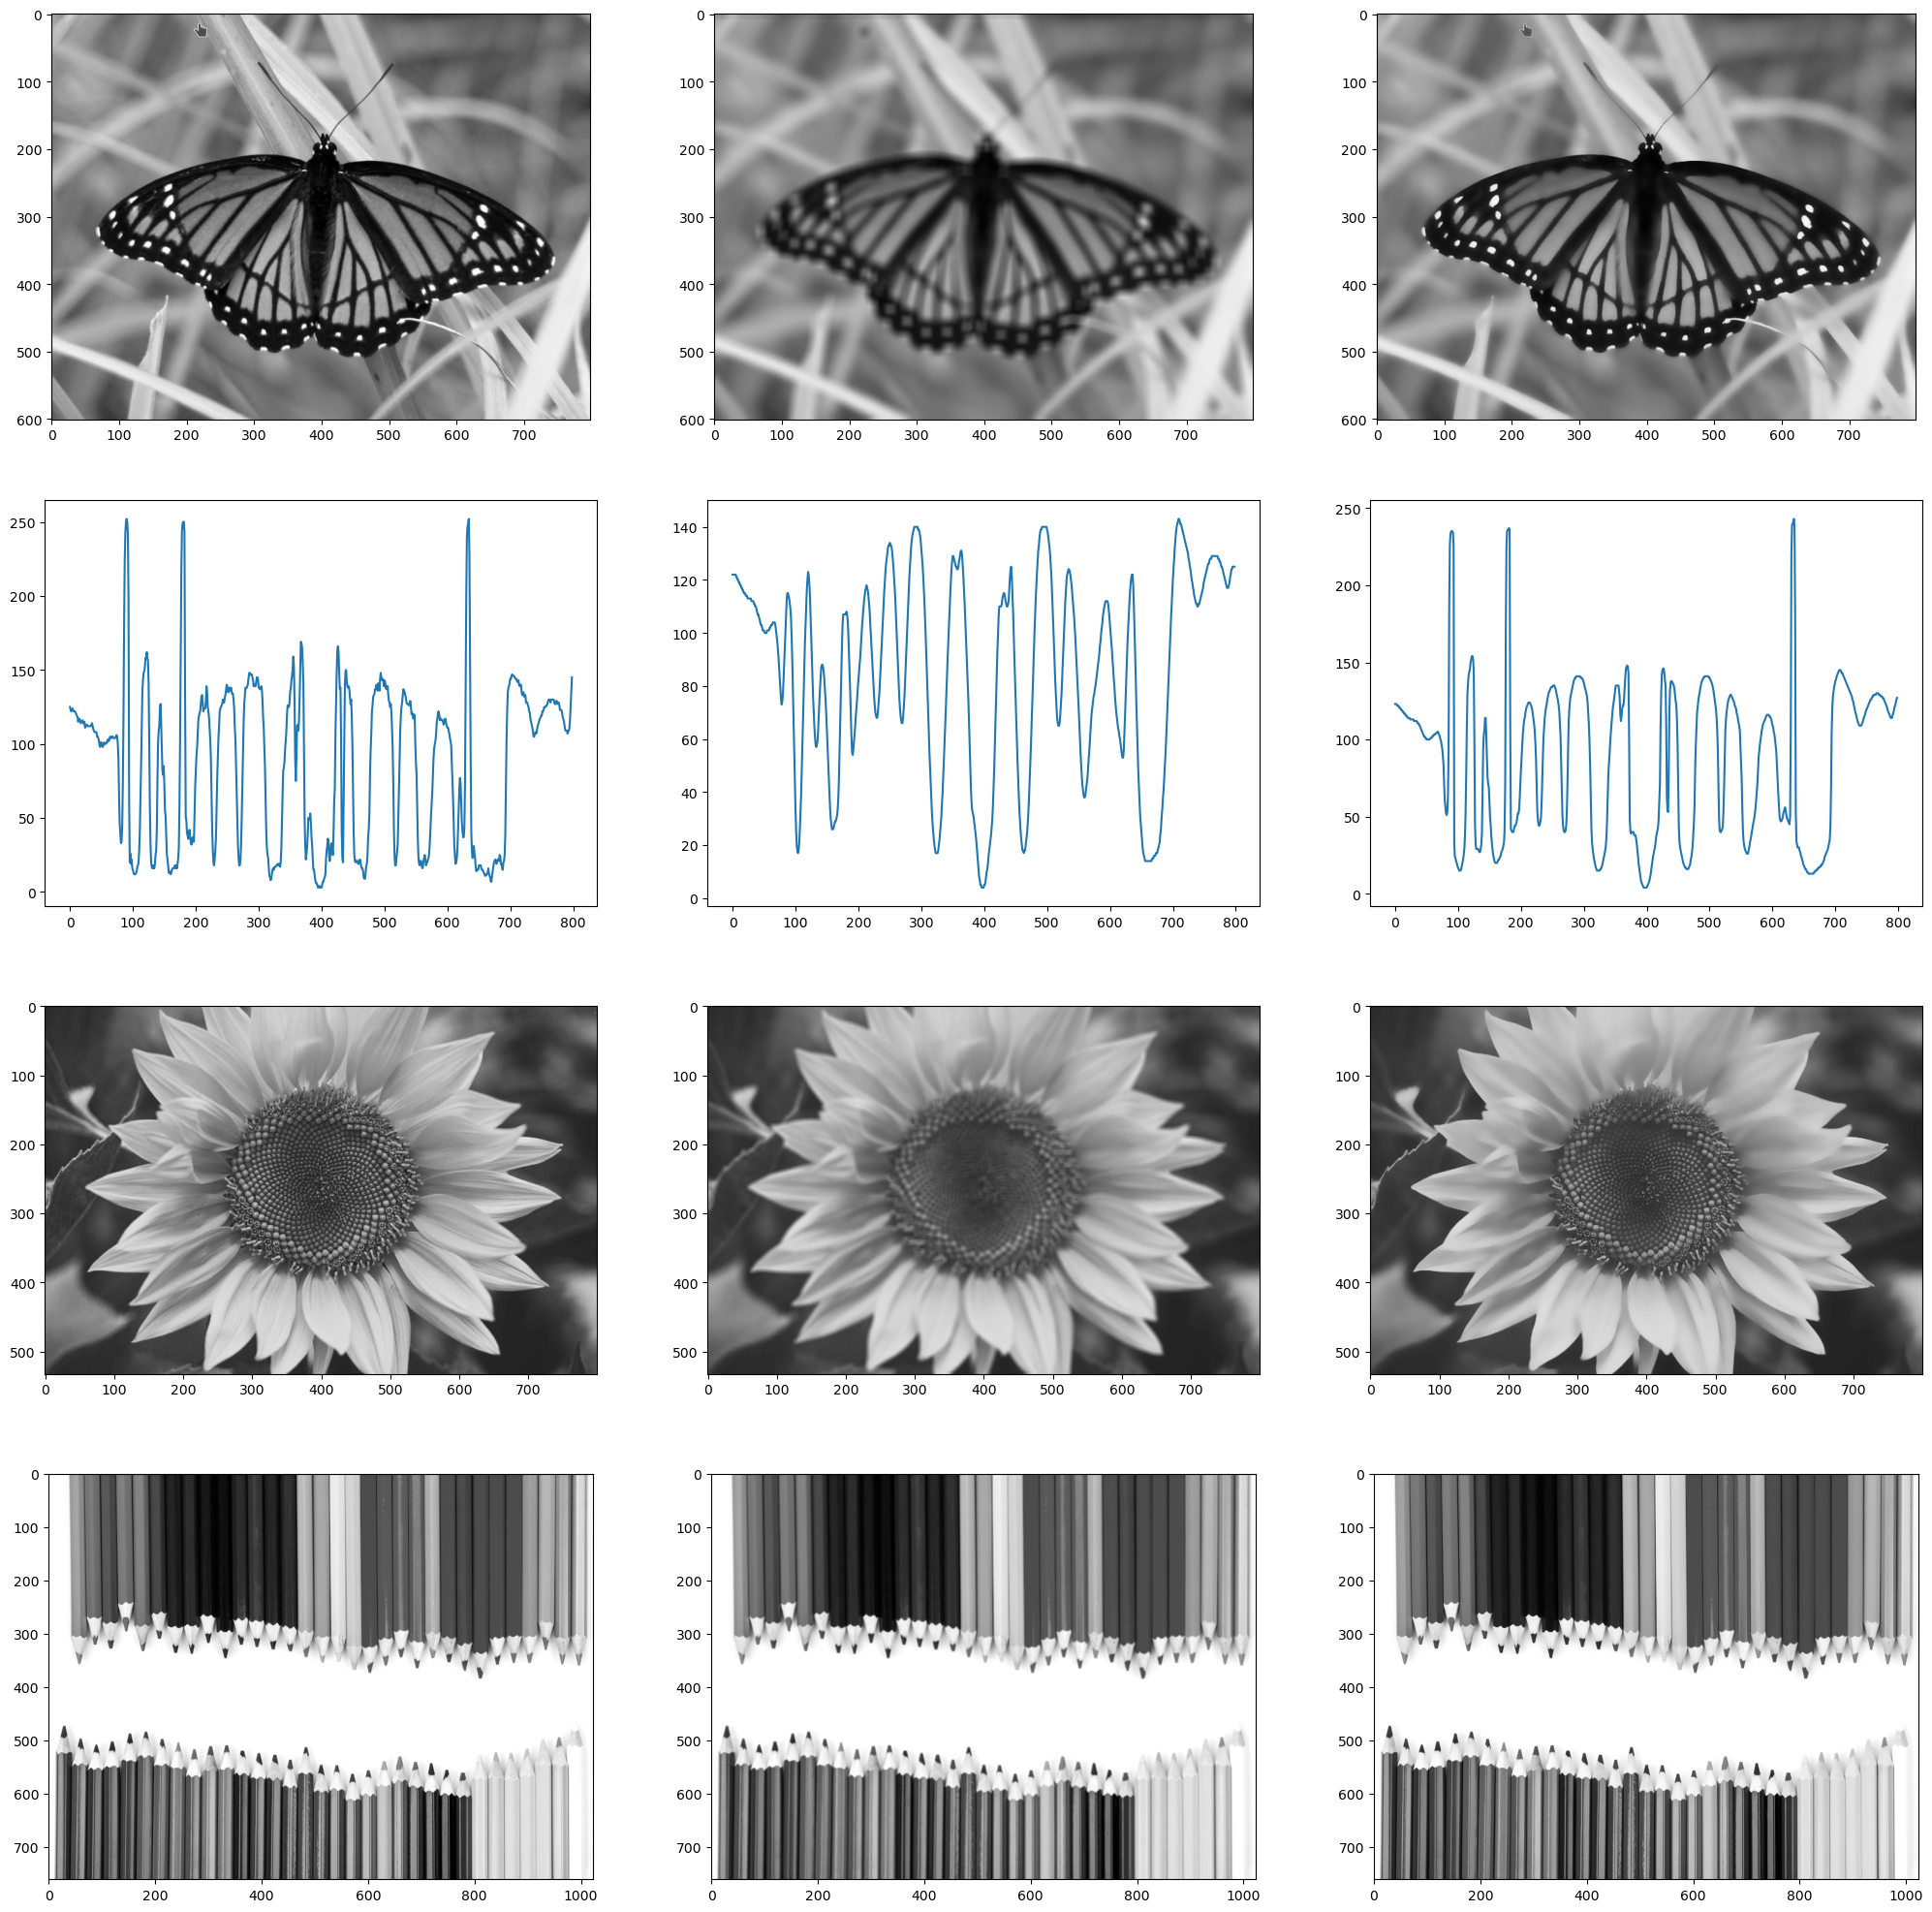

In [11]:
fig,ax = plt.subplots(4,3,figsize=(25,25))
ax[0,0].imshow(mariposa,cmap="gray",vmin=0,vmax=255)
ax[0,1].imshow(mariposa_box,cmap="gray",vmin=0,vmax=255)
ax[0,2].imshow(mariposa_bilateral,cmap="gray",vmin=0,vmax=255)

ax[1,0].plot(perfil_mariposa)
ax[1,1].plot(perfil_mariposa_box)
ax[1,2].plot(perfil_mariposa_bilateral)

ax[2,0].imshow(flores,cmap="gray",vmin=0,vmax=255)
ax[2,1].imshow(flores_box,cmap="gray",vmin=0,vmax=255)
ax[2,2].imshow(flores_bilateral,cmap="gray",vmin=0,vmax=255)

ax[3,0].imshow(lapices,cmap="gray",vmin=0,vmax=255)
ax[3,1].imshow(lapices_box,cmap="gray",vmin=0,vmax=255)
ax[3,2].imshow(lapices_bilateral,cmap="gray",vmin=0,vmax=255)
plt.show()

Se puede notar que al utilizar el box al aumentar el tamaño de kernel la imagen comienza a ser borrosa en su totalidad, mientras que al utilizar el bilateral este mantiene en gran medida los bordes y los detalles de la imagen. Esto debido a que el el filtro bilateral utiliza dos máscaras: una que controla la suavidad de la imagen y otra que controla la similitud entre los píxeles.

Guia 4

Ejercicio 4

Este proceso permite separar la imagen en regiones utilizando informacion del color.
En este ejercicio usted debe implementar la segmentaci´on de im´agenes para los modelos de color RGB y HSV. En cada caso debera determinar el subespacio a segmentar para generar una mascara, que luego utilizara para extraer solo la informacion de interes de la imagen original.
En cuanto a la metodologıa, le proponemos que utilice la imagen ‘futbol.jpg’ y defina una ROI representativa del color a segmentar, luego
- para el modelo RGB:

Use la informacion para calcular el centro de la esfera y su radio. Podrıa reemplazar la formula de la esfera por la de una elipsoide.
- para el modelo HSV:

Utilice las componentes H y S para determinar el subespacio rectangular a segmentar.
Consejo: utilizar los histogramas puede ser una buena alternativa.
- Compare, analice y saque conclusiones sobre los resultados de ambos metodos.
- Pruebe su implementacion con otras imagenes, por ejemplo segmentando solo la piel en las imagenes s01 i08 H CM.png, s03 i10 H DM.png, s05 i08 H LB.png, s06 i13 H LV.png, s08 i06 H MA.png.

Analice el desempeño de ambos metodos.


¿Que metodo le parece mejor?
¿Es posible obtener un conjunto de valores optimo para todas las imagenes?

¿Es suficiente aplicar la segmentacion sin metodos de pre-procesamiento (realce o filtrado)?

¿Donde cree usted que estan los mayores inconvenientes?

¿Que condiciones observa en la escena que son homogeneas y cuales heterogeneas? (distancia camara-objeto, foco, iluminacion ambiente, fondo de la escena, ubicacion y pose del sujeto, color de piel, vestimenta y accesorios, etc.)

A partir de estos analisis, ¿Podrıa usted generar una lista de consideraciones utiles para generar una base de datos de imagenes?


In [12]:
from scipy.spatial import distance

def func_esfera(img,roi,R):
    BGR_roi = cv.split(roi)

    maxB=np.argmax(np.histogram(BGR_roi[0],np.arange(256))[0])
    maxG=np.argmax(np.histogram(BGR_roi[1],np.arange(256))[0])
    maxR=np.argmax(np.histogram(BGR_roi[2],np.arange(256))[0])
    H,W = img.shape[0:2]
    maskBGR = np.zeros((H,W),np.uint8)

    for i in range(H):
        for j in range(W):
            bgr_imagen = img[i][j]
            if distance.euclidean((maxB,maxG,maxR),(bgr_imagen[0],bgr_imagen[1],bgr_imagen[2])) <= R:
                maskBGR[i][j]=255
    return maskBGR

def func_cubo(img,roi,deltaHue,deltaSatu):
    
    HSV = cv.split(cv.cvtColor(roi, cv.COLOR_BGR2HSV))
    HSV_img = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))
    
    
    maxH=np.argmax(np.histogram(HSV[0],np.arange(256))[0])
    maxS=np.argmax(np.histogram(HSV[1],np.arange(256))[0])

    H,W = img.shape[0:2]
    maskHSV = np.zeros((H,W),np.uint8)

    for i in np.arange(H):
        for j in np.arange(W):
            pxH = HSV_img[0][i,j]
            pxS = HSV_img[1][i,j]
            if  pxH >=maxH-deltaHue and pxH <=maxH+deltaHue and pxS>=maxS-deltaSatu and pxS <=maxS+deltaSatu:
                maskHSV[i,j] = 255
    return maskHSV

(382, 450, 3) (382, 450)


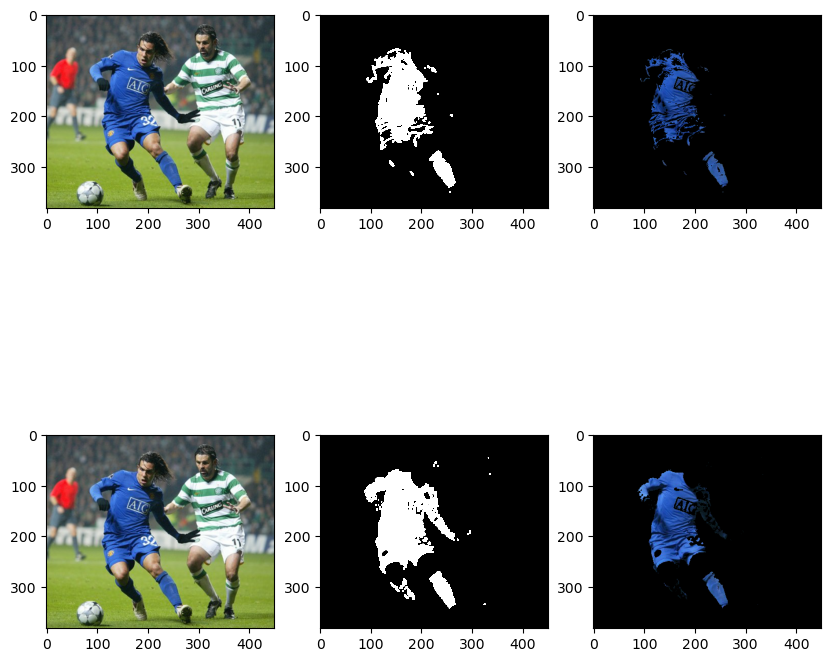

In [13]:
fulvo = cv.imread('imagenes/futbol.jpg')

roi = fulvo[160:200,130:170]
maskBGR = func_esfera(fulvo,roi,100)
maskHSV = func_cubo(fulvo,roi,15,110)
RGB = cv.split(fulvo)

print(fulvo.shape,maskHSV.shape)
imagen = cv.bitwise_and(fulvo,fulvo,mask=maskBGR)
imagen2 = cv.bitwise_and(fulvo,fulvo,mask=maskHSV)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10)) 
ax[0,0].imshow(fulvo[:,:,[2,1,0]])
ax[0,1].imshow(maskBGR,cmap="gray",vmin=0,vmax=1) 
ax[0,2].imshow(imagen[:,:,[2,1,0]])
ax[1,0].imshow(fulvo[:,:,[2,1,0]])
ax[1,1].imshow(maskHSV,cmap="gray",vmin=0,vmax=1) 
ax[1,2].imshow(imagen2[:,:,[2,1,0]])
plt.show()

In [14]:
cesar = cv.imread("imagenes/s01_i08_H_CM.png")
milone = cv.imread("imagenes/s03_i10_H_DM.png")
lea = cv.imread("imagenes/s05_i08_H_LB.png")
vignolo = cv.imread("imagenes/s06_i13_H_LV.png")
alb = cv.imread("imagenes/s08_i06_H_MA.png")


roi_cesar = cesar[160:210,270:330]
roi_milone = milone[300:340,270:320]
roi_lea = lea[120:170,270:330]
roi_vignolo = vignolo[160:210,250:310]
roi_alb = alb[110:160,270:330]

maskHSV_cesar = func_cubo(cesar,roi_cesar,15,110)
maskHSV_milone = func_cubo(milone,roi_milone,15,110)
maskHSV_lea = func_cubo(lea,roi_lea,15,110)
maskHSV_vignolo = func_cubo(vignolo,roi_vignolo,15,110)
maskHSV_alb = func_cubo(alb,roi_alb,15,110)

print(cesar.shape,maskHSV_cesar.shape)
segm_cesar = cv.bitwise_and(cesar,cesar,mask=maskHSV_cesar)
segm_milone = cv.bitwise_and(milone,milone,mask=maskHSV_milone)
segm_lea = cv.bitwise_and(lea,lea,mask=maskHSV_lea)
segm_vignolo = cv.bitwise_and(vignolo,vignolo,mask=maskHSV_vignolo)
segm_alb = cv.bitwise_and(alb,alb,mask=maskHSV_alb)

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(10,10)) 
ax[0,0].imshow(cesar[:,:,[2,1,0]])
ax[0,1].imshow(roi_cesar[:,:,[2,1,0]])
ax[0,2].imshow(segm_cesar[:,:,[2,1,0]])

ax[1,0].imshow(milone[:,:,[2,1,0]])
ax[1,1].imshow(roi_milone[:,:,[2,1,0]])
ax[1,2].imshow(segm_milone[:,:,[2,1,0]])

ax[2,0].imshow(lea[:,:,[2,1,0]])
ax[2,1].imshow(roi_lea[:,:,[2,1,0]])
ax[2,2].imshow(segm_lea[:,:,[2,1,0]])

ax[3,0].imshow(vignolo[:,:,[2,1,0]])
ax[3,1].imshow(roi_vignolo[:,:,[2,1,0]])
ax[3,2].imshow(segm_vignolo[:,:,[2,1,0]])

ax[4,0].imshow(alb[:,:,[2,1,0]])
ax[4,1].imshow(roi_alb[:,:,[2,1,0]])
ax[4,2].imshow(segm_alb[:,:,[2,1,0]])
plt.show()

(480, 640, 3) (480, 640)


es posible aplicar este metodo sin realizar un preprocesamiento sin embargo los resultados no seran tan buenos, por ejemplo, en las imganes de los profesores tenemos el inconveniente de que la piel tiene distinto tonos en diferentes partes, a esto se le suma el brillo y la sombra y es muy dificil tomar un color de referencia con una simple ROI. Para realizar sitematicamente un proceso similar en un dataset de imagenes estas deberian tener escenas homogeneas, ya que se mantendrian constantes variables como distancia camara-objeto, foco, iluminacion ambiente, fondo de la escena, etc.

Guia 4

Ejercicio 5.2

El gobierno de la provincia de Misiones lo ha contratado para realizar una aplicacion que sea capaz de detectar zonas deforestadas. Para desarrollar un primer prototipo le han suministrado una imagen satelital (Deforestacion.png) en la que un experto ya delimito el area donde deberıa existir monte nativo y sobre la cual usted debe trabajar. Se requiere que su aplicacion:

- Segmente y resalte en algun tono de rojo el area deforestada.
- Calcule el area total (hectareas) de la zona delimitada, el area de la zona que tiene monte y el area de la zona deforestada.
- (Opcional) Detecte automaticamente la delimitacion de la zona.



In [15]:
bosquent = cv.imread('imagenes\Deforestacion.png')
bosquecito = bosquent[280:700,160:730] #zona a trabajar
bosquecito_pb= cv.boxFilter(bosquecito,-1,(40,40)) #blur de la imagen original
roi = bosquecito[330:400,40:100] #roi de el area deforestada

maskBGR = func_esfera(bosquecito_pb,roi,22) #mascara de la segmentacion color

imagen = cv.bitwise_and(bosquecito,bosquecito,mask=maskBGR)

BGR_BOSQUE = np.array(cv.split(bosquecito))
m = np.copy(bosquecito[:,:,2]) #creamos un canal rojo para modificar
m[maskBGR!=0]=255 #llevamos la intencidad del canal a 255 donde se encuentra la zona deforestada
BGR_BOSQUE[2] = m
bosquecito_rojo = cv.merge(BGR_BOSQUE)
fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(bosquecito[:,:,[2,1,0]])
ax[1].imshow(bosquecito_pb[:,:,[2,1,0]])
ax[2].imshow(imagen[:,:,[2,1,0]])
ax[3].imshow(bosquecito_rojo[:,:,[2,1,0]])
plt.show()

957600 171056 786544
Porcentaje cubierto del area total: 
 Area Deforestada: %17.862990810359232
 Area Monte: %82.13700918964076


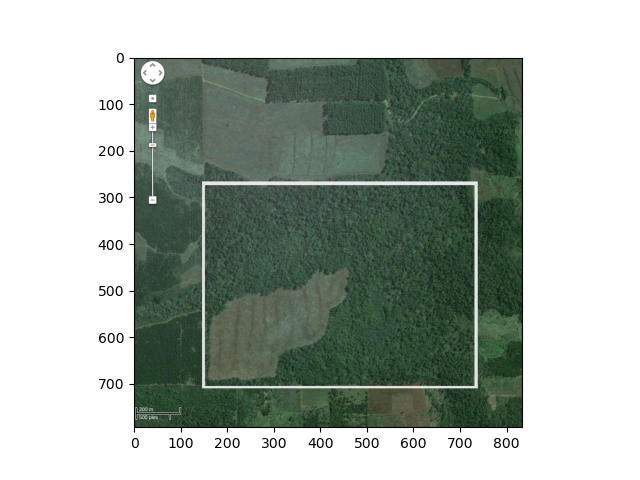

In [16]:
%matplotlib widget
bosquent = cv.imread('imagenes\Deforestacion.png')

#Segun la escala 100 pixeles de largo equivalen a 200m aproximadamente por lo que cada pixel tiene un area de 4m^2

H,W,_ = bosquecito.shape

area_total = 4*H*W
area_deforestada = np.count_nonzero(maskBGR) * 4
area_monte = area_total-area_deforestada

print(area_total,area_deforestada,area_monte)
print("Porcentaje cubierto del area total: \n Area Deforestada: %"
      +str(area_deforestada*100/area_total)+"\n Area Monte: %"
      +str(area_monte*100/area_total))


plt.imshow(bosquent[:,:,[2,1,0]])
plt.show()